In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import fisher_exact
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
import numpy as np

In [44]:
survey = pd.read_csv('C:/Users/joice/OneDrive/Documentos/Ironhack/ML course/Labs w7/Project FoE/FoE.csv')

In [45]:
survey.head()

,Timestamp,What is your age group?,Where are you from? (Country only),For how long have you been playing FoE?,Have you ever spent money on in-game purchases?,"How much do you spend per year, approximately? (Consider values on US Dolar, Euros or Pounds)",What is your main purpose for spending? (Pick the most accurate),Which is your guild style?,What is your guild size?,Have you ever led a guild in this game?,"In real life, have you ever managed people (as a manager, business owner, or supervisor)?"
0,10/10/2024 23:50:01,20 to 34,United Kingdom,More than 4 years,A few times per year,Up to 100,Reach higher event leagues and get more Grand ...,Competitive,More than 60,"Yes, for a while",Yes
1,11/10/2024 00:33:24,35 to 49,UK,Between 1 and 2 years,A few times per year,Up to 100,"Other (Quantum Incursions, Guild Expedition, S...",Competitive,Up to 20 players,Never,No
2,11/10/2024 02:36:39,More than 64,Born England - Living USA,Between 2 and 4 years,Never,0 (Do not spend),Do not spend,Competitive,Up to 20 players,"Yes, for a while",Yes
3,11/10/2024 02:50:03,50 to 64,Australia,Between 2 and 4 years,Never,0 (Do not spend),Do not spend,Active but non-competitive,Up to 20 players,Never,Yes
4,11/10/2024 03:28:05,35 to 49,canada,Between 1 and 2 years,A few times per year,Up to 500,Reach higher event leagues and get more Grand ...,Competitive,More than 60,I currently lead one,Yes


In [46]:
survey.columns

Index(['Timestamp', 'What is your age group?  ',
       'Where are you from? (Country only)',
       'For how long have you been playing FoE?',
       'Have you ever spent money on in-game purchases?',
       'How much do you spend per year, approximately? (Consider values on US Dolar, Euros or Pounds)',
       'What is your main purpose for spending? (Pick the most accurate)',
       'Which is your guild style?', 'What is your guild size?',
       'Have you ever led a guild in this game? ',
       'In real life, have you ever managed people (as a manager, business owner, or supervisor)?  '],
      dtype='object')

In [47]:
# Cleaning column names (names used for survey questions are not great for presentation charts)

survey.columns = [
    'timestamp', 'age_group', 'country', 'tenure',
    'purchase_frequency', 'amount', 'purchase_type', 'player_style',
    'guild_size', 'leader_ingame', 'leader_rl'
]

In [48]:
survey.sample(20)

,timestamp,age_group,country,tenure,purchase_frequency,amount,purchase_type,player_style,guild_size,leader_ingame,leader_rl
2,11/10/2024 02:36:39,More than 64,Born England - Living USA,Between 2 and 4 years,Never,0 (Do not spend),Do not spend,Competitive,Up to 20 players,"Yes, for a while",Yes
33,11/10/2024 17:06:23,50 to 64,Australia,More than 4 years,A few times per year,Up to 20,"Other (Quantum Incursions, Guild Expedition, S...",Competitive,Up to 20 players,Never,No
31,11/10/2024 16:24:59,20 to 34,England,More than 4 years,Every month,More than 1000,Reach higher event leagues and get more Grand ...,Competitive,More than 60,Never,No
30,11/10/2024 16:09:06,50 to 64,United kingdom,Between 2 and 4 years,Only once,Up to 20,Reach higher event leagues and get more Grand ...,Active but non-competitive,21 to 40 players,I currently lead one,Yes
41,11/10/2024 18:09:56,35 to 49,UK,Between 2 and 4 years,A few times per year,Up to 20,"Other (Quantum Incursions, Guild Expedition, S...",For fun/ casual,21 to 40 players,"Yes, for a while",No
4,11/10/2024 03:28:05,35 to 49,canada,Between 1 and 2 years,A few times per year,Up to 500,Reach higher event leagues and get more Grand ...,Competitive,More than 60,I currently lead one,Yes
58,11/10/2024 23:11:44,50 to 64,USA,Between 1 and 2 years,Never,0 (Do not spend),Do not spend,Competitive,More than 60,Never,No
51,11/10/2024 20:32:52,35 to 49,Serbia,Between 3 months and a year,Only once,Up to 20,"Other (Quantum Incursions, Guild Expedition, S...",For fun/ casual,Up to 20 players,Never,Yes
68,12/10/2024 02:22:33,More than 64,Canada,More than 4 years,A few times per year,Up to 500,Reach higher event leagues and get more Grand ...,Competitive,41 to 60 players,I currently lead one,Yes
71,12/10/2024 04:54:14,50 to 64,Sweden,More than 4 years,A few times per year,Up to 100,Compete in Guild Battleground,Competitive,More than 60,"Yes, for a while",No


In [49]:
# Country names are messing. I must cleab then. 
survey['country'].value_counts()

country
UK                           11
Australia                     9
England                       9
Canada                        4
Australia                     3
uk                            3
Romania                       2
Hungary                       2
Serbia                        2
United Kingdom                2
South Africa                  2
Slovenija                     1
Uk                            1
Philippines                   1
USA                           1
wales                         1
Germany                       1
Russia                        1
Sweden                        1
romania                       1
England                       1
Greece                        1
Czech Republic                1
Sri Lanka                     1
NL                            1
Scotland                      1
Montenegro                    1
belgium                       1
Latvia                        1
United kingdom                1
Canada                        1


In [50]:
def clean_country_names(country):
    if isinstance(country, str):
        country = country.strip().lower()
        if country == 'nan':
            return 'Other'
        if country in ['uk', 'england', 'wales', 'scotland', 'united kingdom']:
            return 'United Kingdom'
        elif country in ['usa', 'us', 'born england - living usa']:
            return 'United States'
        elif country == 'nl':
            return 'Netherlands'
        elif country == 'slovenija':
            return 'Slovenia'
        elif country == 'india.':
            return 'India'
        else:
            return country.title()
    else:
        return 'Other'

survey['country'] = survey['country'].apply(clean_country_names)

In [51]:
#There are 27 different countries. However, I decided to not use in this analysis, because it's too much spreaded. 

survey['country'].value_counts()

country
United Kingdom    32
Australia         12
Canada             6
United States      3
Romania            3
South Africa       2
Hungary            2
Serbia             2
Sri Lanka          1
Greece             1
Sweden             1
Russia             1
Philippines        1
Slovenia           1
Germany            1
Czech Republic     1
Belgium            1
Netherlands        1
Montenegro         1
Latvia             1
Other              1
Bulgaria           1
Taiwan             1
Switzerland        1
India              1
Italy              1
Spain              1
Name: count, dtype: int64

In [52]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   timestamp           81 non-null     object
 1   age_group           81 non-null     object
 2   country             81 non-null     object
 3   tenure              81 non-null     object
 4   purchase_frequency  81 non-null     object
 5   amount              81 non-null     object
 6   purchase_type       81 non-null     object
 7   player_style        81 non-null     object
 8   guild_size          81 non-null     object
 9   leader_ingame       81 non-null     object
 10  leader_rl           81 non-null     object
dtypes: object(11)
memory usage: 7.1+ KB


In [53]:
spending_distribution = survey['amount'].value_counts()
spending_distribution

amount
0 (Do not spend)    31
Up to 20            14
Up to 100           12
Up to 50             9
Up to 500            6
Up to 300            6
More than 1000       3
Name: count, dtype: int64

##### In the cells below I am narrowing segmentations

In [54]:
spending_groups = {
    '0 (Do not spend)': 'No spenders',
    'Up to 20': 'Lower spenders',
    'Up to 50': 'Lower spenders',
    'Up to 100': 'Moderate spenders',
    'Up to 300': 'Moderate spenders',
    'Up to 500': 'Higher spenders',
    'Up to 1000': 'Higher spenders',
    'More than 1000': 'Higher spenders'
}

survey['spending_group'] = survey['amount'].map(spending_groups)

In [55]:
leader_status = {
    'Yes, for a while':'No leader',
    'Never': 'No leader',
    'I currently lead one': 'Leader'
}

survey['leader_status'] = survey['leader_ingame'].map(leader_status)

In [56]:
survey['overall_leadership'] = survey.apply(
    lambda row: 'Real life and in game' if row['leader_rl'] == 'Yes' and row['leader_status'] == 'Leader' else
                'Real life' if row['leader_rl'] == 'Yes' and row['leader_status'] == 'No leader' else
                'In game' if row['leader_rl'] == 'No' and row['leader_status'] == 'Leader' else
                'Non leader' if row['leader_rl'] == 'No' and row['leader_status'] == 'No leader' else None,
    axis=1
)

In [57]:
survey.head()

,timestamp,age_group,country,tenure,purchase_frequency,amount,purchase_type,player_style,guild_size,leader_ingame,leader_rl,spending_group,leader_status,overall_leadership
0,10/10/2024 23:50:01,20 to 34,United Kingdom,More than 4 years,A few times per year,Up to 100,Reach higher event leagues and get more Grand ...,Competitive,More than 60,"Yes, for a while",Yes,Moderate spenders,No leader,Real life
1,11/10/2024 00:33:24,35 to 49,United Kingdom,Between 1 and 2 years,A few times per year,Up to 100,"Other (Quantum Incursions, Guild Expedition, S...",Competitive,Up to 20 players,Never,No,Moderate spenders,No leader,Non leader
2,11/10/2024 02:36:39,More than 64,United States,Between 2 and 4 years,Never,0 (Do not spend),Do not spend,Competitive,Up to 20 players,"Yes, for a while",Yes,No spenders,No leader,Real life
3,11/10/2024 02:50:03,50 to 64,Australia,Between 2 and 4 years,Never,0 (Do not spend),Do not spend,Active but non-competitive,Up to 20 players,Never,Yes,No spenders,No leader,Real life
4,11/10/2024 03:28:05,35 to 49,Canada,Between 1 and 2 years,A few times per year,Up to 500,Reach higher event leagues and get more Grand ...,Competitive,More than 60,I currently lead one,Yes,Higher spenders,Leader,Real life and in game


In [58]:
spender_class = {
    '0 (Do not spend)': 'No spenders',
    'Up to 20': 'Lower spenders',
    'Up to 50': 'Lower spenders',
    'Up to 100': 'Moderate spenders',
    'Up to 300': 'Moderate spenders',
    'Up to 500': 'Higher spenders',
    'Up to 1000': 'Higher spenders',
    'More than 1000': 'Higher spenders'
}

survey['spender_class'] = survey['amount'].map(spender_class)

In [59]:
# There are players that answered 'Do not spent', but in quests about spending frequency or purchise type, indicated activity
# In the cells below I clean it setting all attributes to not spending. 

survey[survey['amount'] == '0 (Do not spend)']

,timestamp,age_group,country,tenure,purchase_frequency,amount,purchase_type,player_style,guild_size,leader_ingame,leader_rl,spending_group,leader_status,overall_leadership,spender_class
2,11/10/2024 02:36:39,More than 64,United States,Between 2 and 4 years,Never,0 (Do not spend),Do not spend,Competitive,Up to 20 players,"Yes, for a while",Yes,No spenders,No leader,Real life,No spenders
3,11/10/2024 02:50:03,50 to 64,Australia,Between 2 and 4 years,Never,0 (Do not spend),Do not spend,Active but non-competitive,Up to 20 players,Never,Yes,No spenders,No leader,Real life,No spenders
5,11/10/2024 04:10:47,More than 64,Canada,More than 4 years,Never,0 (Do not spend),Do not spend,Competitive,41 to 60 players,"Yes, for a while",Yes,No spenders,No leader,Real life,No spenders
8,11/10/2024 06:45:05,20 to 34,South Africa,Less than 3 months,A few times per year,0 (Do not spend),Do not spend,I play alone,21 to 40 players,Never,Yes,No spenders,No leader,Real life,No spenders
10,11/10/2024 07:47:56,35 to 49,India,Less than 3 months,Never,0 (Do not spend),Do not spend,Competitive,More than 60,Never,Yes,No spenders,No leader,Real life,No spenders
14,11/10/2024 09:53:05,50 to 64,United Kingdom,Between 2 and 4 years,Never,0 (Do not spend),Do not spend,Competitive,More than 60,"Yes, for a while",Yes,No spenders,No leader,Real life,No spenders
18,11/10/2024 15:43:56,35 to 49,Taiwan,More than 4 years,Never,0 (Do not spend),Do not spend,Active but non-competitive,More than 60,I currently lead one,No,No spenders,Leader,In game,No spenders
19,11/10/2024 15:44:19,35 to 49,United Kingdom,Between 3 months and a year,Never,0 (Do not spend),Do not spend,Competitive,More than 60,I currently lead one,Yes,No spenders,Leader,Real life and in game,No spenders
25,11/10/2024 15:48:47,50 to 64,Canada,More than 4 years,Only once,0 (Do not spend),Do not spend,Competitive,More than 60,I currently lead one,Yes,No spenders,Leader,Real life and in game,No spenders
26,11/10/2024 15:59:59,50 to 64,United Kingdom,More than 4 years,Never,0 (Do not spend),Do not spend,Active but non-competitive,More than 60,I currently lead one,Yes,No spenders,Leader,Real life and in game,No spenders


In [60]:
survey.loc[survey['amount'] == '0 (Do not spend)', 'purchase_frequency'] = 'Never'
survey.loc[survey['amount'] == '0 (Do not spend)', 'purchase_type'] = 'Do not spend'

In [61]:
survey[survey['amount'] == '0 (Do not spend)']

,timestamp,age_group,country,tenure,purchase_frequency,amount,purchase_type,player_style,guild_size,leader_ingame,leader_rl,spending_group,leader_status,overall_leadership,spender_class
2,11/10/2024 02:36:39,More than 64,United States,Between 2 and 4 years,Never,0 (Do not spend),Do not spend,Competitive,Up to 20 players,"Yes, for a while",Yes,No spenders,No leader,Real life,No spenders
3,11/10/2024 02:50:03,50 to 64,Australia,Between 2 and 4 years,Never,0 (Do not spend),Do not spend,Active but non-competitive,Up to 20 players,Never,Yes,No spenders,No leader,Real life,No spenders
5,11/10/2024 04:10:47,More than 64,Canada,More than 4 years,Never,0 (Do not spend),Do not spend,Competitive,41 to 60 players,"Yes, for a while",Yes,No spenders,No leader,Real life,No spenders
8,11/10/2024 06:45:05,20 to 34,South Africa,Less than 3 months,Never,0 (Do not spend),Do not spend,I play alone,21 to 40 players,Never,Yes,No spenders,No leader,Real life,No spenders
10,11/10/2024 07:47:56,35 to 49,India,Less than 3 months,Never,0 (Do not spend),Do not spend,Competitive,More than 60,Never,Yes,No spenders,No leader,Real life,No spenders
14,11/10/2024 09:53:05,50 to 64,United Kingdom,Between 2 and 4 years,Never,0 (Do not spend),Do not spend,Competitive,More than 60,"Yes, for a while",Yes,No spenders,No leader,Real life,No spenders
18,11/10/2024 15:43:56,35 to 49,Taiwan,More than 4 years,Never,0 (Do not spend),Do not spend,Active but non-competitive,More than 60,I currently lead one,No,No spenders,Leader,In game,No spenders
19,11/10/2024 15:44:19,35 to 49,United Kingdom,Between 3 months and a year,Never,0 (Do not spend),Do not spend,Competitive,More than 60,I currently lead one,Yes,No spenders,Leader,Real life and in game,No spenders
25,11/10/2024 15:48:47,50 to 64,Canada,More than 4 years,Never,0 (Do not spend),Do not spend,Competitive,More than 60,I currently lead one,Yes,No spenders,Leader,Real life and in game,No spenders
26,11/10/2024 15:59:59,50 to 64,United Kingdom,More than 4 years,Never,0 (Do not spend),Do not spend,Active but non-competitive,More than 60,I currently lead one,Yes,No spenders,Leader,Real life and in game,No spenders


In [62]:
# The segmentation of the data is not sufficient to create significative statistical results. 

# Test if the proportion of spending users that spend over 300€ and have a considerble frequency, represents 20% of the users
filtered_spenders = survey[(survey['amount'].isin(['Up to 300', 'Up to 500', 'More than 1000'])) &
                           (survey['purchase_frequency'].isin(['A few times per year', 'Every month']))]


In [63]:
total_users = len(survey)
spenders_count = len(filtered_spenders)
observed_proportion = spenders_count / total_users
print(f'Observed proportion: {observed_proportion:.2%}')

Observed proportion: 18.52%


In [64]:
# We observe that the sample proportion of this segment of spenders is 18%. 
# The test shows, with 95% confidence level, that these spenders are in a range between 10% and 27%.
# Statistically, we cannot affirm that players follow the Pareto's principle. 

expected_proportion = 0.20
z_stat, p_value = proportions_ztest(count=spenders_count, nobs=total_users, value=expected_proportion)

confidence_level = 0.95
standard_error = np.sqrt((observed_proportion * (1 - observed_proportion)) / total_users)
margin_of_error = stats.norm.ppf((1 + confidence_level) / 2) * standard_error
confidence_interval = (observed_proportion - margin_of_error, observed_proportion + margin_of_error)

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")
print(f"Observed proportion: {observed_proportion}")
print(f"95% Confidence Interval: {confidence_interval}")

Z-statistic: -0.3432465321284137
P-value: 0.7314130010908413
Observed proportion: 0.18518518518518517
95% Confidence Interval: (0.10059145806253354, 0.2697789123078368)


In [65]:
survey['spending_group'].value_counts()

spending_group
No spenders          31
Lower spenders       23
Moderate spenders    18
Higher spenders       9
Name: count, dtype: int64

In [66]:
survey['purchase_frequency'].value_counts()

purchase_frequency
A few times per year    31
Never                   31
Only once               13
Every month              6
Name: count, dtype: int64

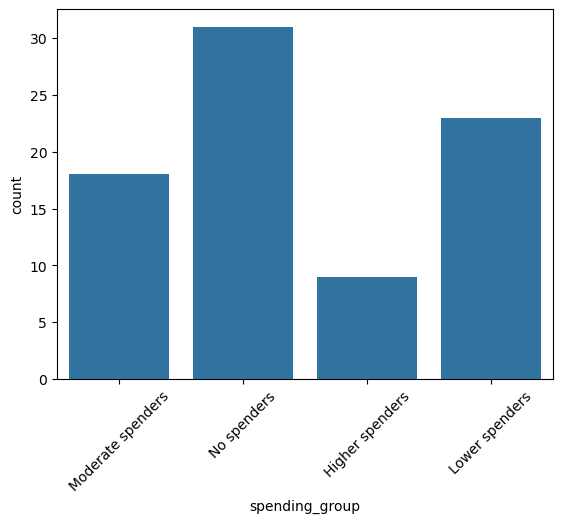

In [67]:

sns.countplot(x='spending_group', data=survey)
plt.xticks(rotation=45)
plt.show()


In [68]:
# Also crossing player style and expenses, but the p-value does not indicate a significant association between these 2 variables. 

contingency_table = pd.crosstab(survey['spending_group'], survey['player_style'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-Square Test p-value: {p_value:.4f}')

Chi-Square Test p-value: 0.9781


In [69]:
# Here the player_style group is narrowed:

survey['player_style'] = survey['player_style'].replace({'I play alone': 'For fun/ casual'})

In [70]:
survey['player_style'].value_counts()

player_style
Competitive                   52
Active but non-competitive    17
For fun/ casual               12
Name: count, dtype: int64

In [42]:

contingency_table = pd.crosstab(survey['spending_group'], survey['player_style'])


chi2, p_value, dof, expected = chi2_contingency(contingency_table)


print(f'Chi-Square Test p-value: {p_value:.4f}')

Chi-Square Test p-value: 0.9850


In [73]:
survey['purchase_type'].value_counts()

purchase_type
Do not spend                                                                            32
Reach higher event leagues and get more Grand Prizes                                    22
Other (Quantum Incursions, Guild Expedition, Settlements, Castle System, Forge Plus)    15
Compete in Guild Battleground                                                            6
Progress faster in the eras or get extra content first                                   6
Name: count, dtype: int64

In [81]:
# Here I am testing if the spending users are mostly spending in events (close to 40%)
# Again, the p-value is pretty high. Also, even lowering the confidence, the interval seems to fall between 20% and 34%

spenders = survey[survey['spender_class'] != 'Non spenders']


event_spenders = spenders[spenders['purchase_type'] == 'Reach higher event leagues and get more Grand Prizes']
event_spenders_count = len(event_spenders)
total_spenders = len(spenders)


observed_proportion = event_spenders_count / total_spenders


expected_proportion = 0.40

# One-proportion z-test
z_stat, p_value = proportions_ztest(count=event_spenders_count, nobs=total_spenders, value=expected_proportion)


confidence_level = 0.85
standard_error = np.sqrt((observed_proportion * (1 - observed_proportion)) / total_spenders)
margin_of_error = stats.norm.ppf((1 + confidence_level) / 2) * standard_error
confidence_interval = (observed_proportion - margin_of_error, observed_proportion + margin_of_error)


print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")
print(f"Observed proportion: {observed_proportion}")
print(f"95% Confidence Interval: {confidence_interval}")

Z-statistic: -2.5979961461377674
P-value: 0.00937695463599002
Observed proportion: 0.2716049382716049
95% Confidence Interval: (0.20046213371206756, 0.3427477428311423)


In [82]:
survey['spender_class'].value_counts()

spender_class
No spenders          31
Lower spenders       23
Moderate spenders    18
Higher spenders       9
Name: count, dtype: int64

In [83]:
# With the whales, using lower confidence, we get a better p-value. 
# But again, we cannot refute the null hypothesis that big spenders are not spending closely to 40% in events. The range is actually above it. 

spenders = survey[survey['spender_class'] == 'Higher spenders']


event_spenders = spenders[spenders['purchase_type'] == 'Reach higher event leagues and get more Grand Prizes']
event_spenders_count = len(event_spenders)
total_spenders = len(spenders)


observed_proportion = event_spenders_count / total_spenders


expected_proportion = 0.40

# One-proportion z-test
z_stat, p_value = proportions_ztest(count=event_spenders_count, nobs=total_spenders, value=expected_proportion)


confidence_level = 0.85
standard_error = np.sqrt((observed_proportion * (1 - observed_proportion)) / total_spenders)
margin_of_error = stats.norm.ppf((1 + confidence_level) / 2) * standard_error
confidence_interval = (observed_proportion - margin_of_error, observed_proportion + margin_of_error)


print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")
print(f"Observed proportion: {observed_proportion}")
print(f"95% Confidence Interval: {confidence_interval}")

Z-statistic: 1.6970562748477138
P-value: 0.08968602177036462
Observed proportion: 0.6666666666666666
95% Confidence Interval: (0.44046611892621595, 0.8928672144071172)
